In [2]:
import numpy as np
from qiskit import IBMQ, execute, Aer
from qiskit import QuantumCircuit
from qiskit import transpile, schedule as build_schedule
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from gadd.ibm import DdCircuit

In [3]:
# get backend
provider = IBMQ.load_account()
#backend = provider.get_backend('ibmq_armonk')
backend = provider.get_backend('ibmq_ourense')

# set-up noise model for simulator
noise_model = NoiseModel.from_backend(backend)
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [4]:
# initilaize circuit with xy4 pulse w/0 native gates
xy4circ = DdCircuit(1, 1)
xy4circ.h(0)
num_gates = xy4circ.gate_xy4(40)
print("This xy4 sequence has {} gates".format(num_gates))
xy4circ.h(0)
xy4circ.measure(0, 0)
#xy4circ.draw()

This xy4 sequence has 160 gates


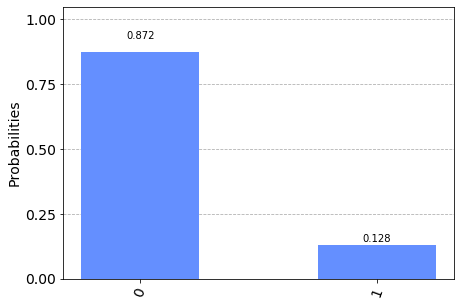

In [5]:
#simulator results
result = execute(xy4circ, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1000000).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [6]:
# initilaize circuit with xy4 pulse WITH native gates
xy4circ2 = DdCircuit(1, 1)
xy4circ2.h(0)
num_gates = xy4circ2.gate_xy4test(40)
print("This xy4 sequence has {} gates".format(num_gates))
xy4circ2.h(0)
xy4circ2.measure(0, 0)
#xy4circ2.draw()

This xy4 sequence has 160 gates


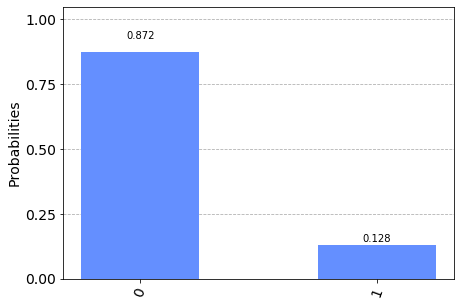

In [7]:
#simulator results
result = execute(xy4circ2, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1000000).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [8]:
# try identity pulse free evolution
fcirc = DdCircuit(1, 1)
fcirc.h(0)
igate_num = fcirc.gate_frev(num_gates)
print("This circuit has {} identity gates.".format(igate_num))
fcirc.h(0)
fcirc.measure(0, 0)
#fcirc.draw()

This circuit has 160 identity gates.


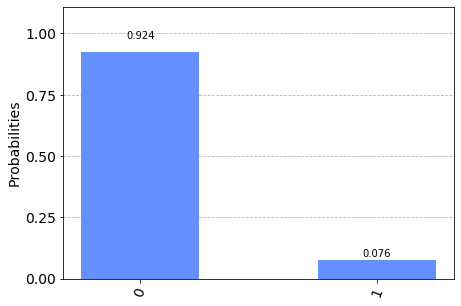

In [9]:
# simulator results
result = execute(fcirc, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1000000).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [23]:
max_shots = backend.configuration().max_shots
max_experiments = backend.configuration().max_experiments

In [ ]:
# free evolution on ibmq_ourense
job = execute([fcirc for x in range(max_experiments)], backend, shots=max_shots)
fresult = job.result()

In [33]:
a, b = 0, 0

In [40]:
def combine_experiments(results):
    counts = results.get_counts()
    num0, num1 = 0, 0
    for ci in counts:
        num0 += ci['0']
        num1 += ci['1']
    
    return {'0': num0, '1': num1}

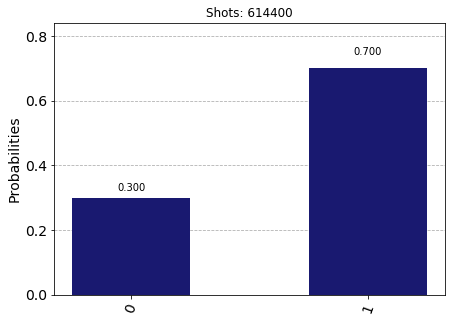

In [45]:
totals = combine_experiments(fresult)
total_shots = totals['0'] + totals['1']
plot_histogram(totals, color='midnightblue', title='Shots: {}'.format(total_shots))

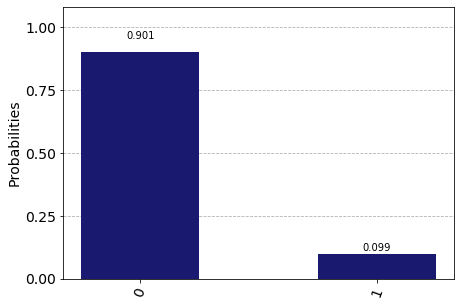

In [11]:
# xy4 in terms of non-native "y" gate on ibmq_ourense
job = execute(xy4circ, backend, shots=4000)
xy4result = job.result()
plot_histogram(xy4result.get_counts(), color='midnightblue')

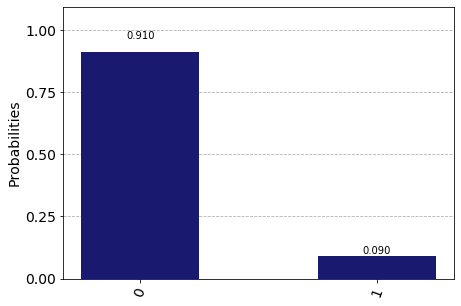

In [12]:
# xy4 in terms of native gates on ibmq_ourense
job = execute(xy4circ2, backend, shots=4000)
xy42result = job.result()
plot_histogram(xy42result.get_counts(), color='midnightblue')

In [39]:
# initilaize circuit with xz4 pulse w/0 native gates
xz4circ = DdCircuit(1, 1)
num_gates = xz4circ.gate_xz4(40)
print("This xz4 sequence has {} gates".format(num_gates))
xz4circ.measure(0, 0)
#xz4circ.draw()

This xz4 sequence has 160 gates


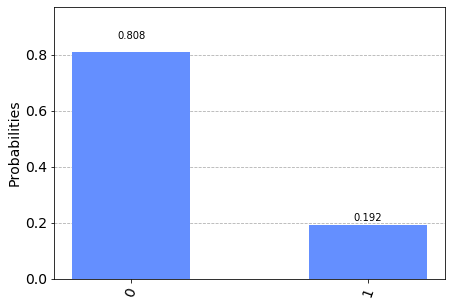

In [40]:
#simulator results
result = execute(xz4circ, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1000000).result()
counts = result.get_counts(0)
plot_histogram(counts)